# ETL y EDA

#### Extracción de data de tres datasets 

##### 'output_steam_games.json' | 'australian_user_reviews.json' | 'australian_users_items.json'



In [59]:
### Importo librerías que voy a utilizar durante el proceso de ETL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import re


____
## DATASET REVIEWS

In [2]:
### Extraigo linea por linea, guardando cada linea en una lista para despues hacer de esa lista un data frame

lineas_reviews = [] 

with open('australian_user_reviews.json', encoding='UTF-8') as f:
    for line in f.readlines():
        lineas_reviews.append(ast.literal_eval(line))

df_reviews = pd.DataFrame(lineas_reviews)

In [3]:
### Veo las primeras lineas del df creado para visualizar un poco de su contenido
df_reviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [4]:
### Veo que tengo una columna con elementos anidados, asique procedo a desanidar

# Lista vacía para almacenar los datos desanidados

reviews_desanidados = []

# Itero a traves de cada fila del df
for index, row in df_reviews.iterrows():
    # Obtengo los valores de las columnas
    user_id = row['user_id']
    user_url = row['user_url']
    for review_dict in row['reviews']:
        review_dict['user_id'] = user_id
        review_dict['user_url'] = user_url
        reviews_desanidados.append(review_dict)

# Actualizo el DataFrame con la lista de datos desanidados 
        
df_reviews = pd.DataFrame(reviews_desanidados)

In [5]:
#Observo su contenido actualizado
df_reviews.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637


In [6]:
#Observo la informacion detallada de su contenido 
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        59305 non-null  object
 1   posted       59305 non-null  object
 2   last_edited  59305 non-null  object
 3   item_id      59305 non-null  object
 4   helpful      59305 non-null  object
 5   recommend    59305 non-null  bool  
 6   review       59305 non-null  object
 7   user_id      59305 non-null  object
 8   user_url     59305 non-null  object
dtypes: bool(1), object(8)
memory usage: 3.7+ MB


In [7]:
# Reemplazo valores vacios por None

df_reviews.replace('', None, inplace=True)
df_reviews.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,None,"Posted November 5, 2011.",None,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,None,"Posted July 15, 2011.",None,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,None,"Posted April 21, 2011.",None,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,None,"Posted June 24, 2014.",None,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
4,None,"Posted September 8, 2013.",None,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637


In [8]:
# Cambio el formato de la fecha para quedarme solo con el año

def date_post(date_str):
    date_r = re.search(r'(\w+\s\d{1,2},\s\d{4})', date_str)
    if date_r:
        date_rvw = date_r.group(1)
        try:
            date_rt = pd.to_datetime(date_rvw)
            return date_rt.strftime('%Y')
        except ValueError:
            return 'Invalid Date'
    else:
        return 'Invalid Format'

df_reviews['posted'] = df_reviews['posted'].apply(date_post)

df_reviews.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,None,2011,None,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,None,2011,None,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,None,2011,None,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,None,2014,None,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
4,None,2013,None,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637


In [9]:
### Elimino las columnas que no me son necesarias o relevantes

df_reviews.drop(['funny', 'last_edited', 'helpful', 'user_url'], axis=1, inplace=True)

In [10]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posted     59305 non-null  object
 1   item_id    59305 non-null  object
 2   recommend  59305 non-null  bool  
 3   review     59275 non-null  object
 4   user_id    59305 non-null  object
dtypes: bool(1), object(4)
memory usage: 1.9+ MB


In [11]:
type(df_reviews['posted'][1])

str

In [12]:
### Procedo a cambiar el tipo de dato de la columna posted a int

# Reemplazar 'Invalid Format' con NaN (valores faltantes)
df_reviews['posted'] = df_reviews['posted'].replace('Invalid Format', pd.NA)

# Convertir los valores de la columna 'posted' a tipo numérico (entero)
df_reviews['posted'] = pd.to_numeric(df_reviews['posted'], errors='coerce')

# Rellenar los valores NaN con 0 y luego convertir a tipo entero
df_reviews['posted'] = df_reviews['posted'].fillna(0).astype(int)

df_reviews['posted'].replace(0, 'No data', inplace=True)
df_reviews.head()

,posted,item_id,recommend,review,user_id
0,2011,1250,True,Simple yet with great replayability. In my opi...,76561197970982479
1,2011,22200,True,It's unique and worth a playthrough.,76561197970982479
2,2011,43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,2014,251610,True,I know what you think when you see this title ...,js41637
4,2013,227300,True,For a simple (it's actually not all that simpl...,js41637


In [13]:
df_reviews['posted'].unique()

array([2011, 2014, 2013, 'No data', 2015, 2012, 2010], dtype=object)

In [14]:
### Veo cantidad de datos nulos
df_reviews.isnull().sum()

posted        0
item_id       0
recommend     0
review       30
user_id       0
dtype: int64

In [15]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posted     59305 non-null  object
 1   item_id    59305 non-null  object
 2   recommend  59305 non-null  bool  
 3   review     59275 non-null  object
 4   user_id    59305 non-null  object
dtypes: bool(1), object(4)
memory usage: 1.9+ MB


In [16]:
### Veo duplicados
df_reviews.duplicated().sum()

874

In [17]:
### Elimino datos duplicados
df_reviews = df_reviews.drop_duplicates()

In [18]:
df_reviews['item_id']=df_reviews['item_id'].astype(int)

In [19]:
# df_reviews['user_id']=df_reviews['user_id'].astype()

In [20]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posted     58431 non-null  object
 1   item_id    58431 non-null  int32 
 2   recommend  58431 non-null  bool  
 3   review     58401 non-null  object
 4   user_id    58431 non-null  object
dtypes: bool(1), int32(1), object(3)
memory usage: 2.1+ MB


____
# DATASET ITEMS

In [21]:
### Estando en formato json, voy a extraer linea por linea, agregar a una lista y despues crear un dataframe con esa lista

lineas_items = [] #   Creo lista vacia donde agregaré las lineas del dataset

with open('australian_users_items.json', encoding='UTF-8') as f:
    for line in f.readlines():
        lineas_items.append(ast.literal_eval(line))

df_items = pd.DataFrame(lineas_items)

In [22]:
### Observo un poco de su contenido
df_items.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [23]:
### Veo que este dataset tambien tiene una columna con datos anidados asique procedo a desanidarlo

# Lista vacía para almacenar los datos desanidados
items_desanidados = []

# Iterar a través de cada fila del DataFrame df_items
for indice, row in df_items.iterrows():
    # Obtener los valores de las columnas de interés de cada fila
    user_id = row['user_id']
    steam_id = row['steam_id']
    user_url = row['user_url']

    # Iterar a través de los elementos de la columna 'items' de la fila actual
    for i in row['items']:
        # Crear un nuevo diccionario con los datos desanidados de cada ítem
        nuevo = {
            'user_id': user_id,
            'steam_id': steam_id,
            'user_url': user_url,
            'item_id': i['item_id'],
            'item_name': i['item_name'],
            'playtime_forever': i['playtime_forever'],
            'playtime_2weeks': i['playtime_2weeks']
        }
        # Agregar el diccionario a la lista 'desanidado'
        items_desanidados.append(nuevo)

# Actualizo df_items a partir de la lista de datos desanidados
df_items = pd.DataFrame(items_desanidados)

In [24]:
### Observo el dframe actualizado

df_items

,user_id,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7,0
3,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0,0
4,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...,...
5153204,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,346330,BrainBread 2,0,0
5153205,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,373330,All Is Dust,0,0
5153206,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,521570,You Have 10 Seconds 2,4,4


In [25]:
# Veo su informacion 

df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   steam_id          object
 2   user_url          object
 3   item_id           object
 4   item_name         object
 5   playtime_forever  int64 
 6   playtime_2weeks   int64 
dtypes: int64(2), object(5)
memory usage: 275.2+ MB


In [26]:
### Elimino columnas innecesarias
df_items = df_items.drop(['playtime_2weeks', 'user_url'], axis=1)

In [27]:
df_items = df_items.drop_duplicates() ### Elimino datos duplicados

In [28]:
df_items.info()  ### Veo que se han borrado unos cuantos

<class 'pandas.core.frame.DataFrame'>
Index: 5094092 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   steam_id          object
 2   item_id           object
 3   item_name         object
 4   playtime_forever  int64 
dtypes: int64(1), object(4)
memory usage: 233.2+ MB


In [29]:
df_items['item_id'] = df_items['item_id'].astype(int)

___
# DATASET STEAM GAMES

In [30]:
### Guardo el dataset en un dataframe

df_steam = pd.read_json('output_steam_games.json', lines=True)

In [31]:
### Veo su contenido 

df_steam.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [32]:
### Veo su informacion
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


In [33]:
### De 120445 entries veo que no mas de 33000 por fila son No Nulos

### Procedo a borrar filas nulas en su totalidad

df_steam.dropna(how='all', inplace=True)
df_steam.head(2)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL


In [34]:
### Miro el total de valores nulos que hay en cada columna

missing = df_steam.isnull().sum() 
missingData = pd.DataFrame({'Valores nulos':missing})
missingData

,Valores nulos
publisher,8052
genres,3283
app_name,2
title,2050
url,0
release_date,2067
tags,163
reviews_url,2
specs,670
price,1377


In [35]:
### Por lo que llegué a notar, la informacion de App_name y title es muy similar. Voy a corroborar

df_steam['app_name'].isin(df_steam['title']).mean() * 100 ### Porcentaje de coincidencia

91.91846895907888

In [36]:
# Rellena los valores nulos en la columna 'id' del DataFrame 'df_steam' con 0 y luego convierte el tipo de datos a entero (int)

df_steam['id'] = df_steam['id'].fillna(0).astype(int)

df_steam['id'] = df_steam['id'].astype(int)

In [37]:
# Completo los nulos con informacion 

df_steam['publisher'] = df_steam['publisher'].fillna(df_steam['developer'])
df_steam['developer'] = df_steam['developer'].fillna(df_steam['publisher'])
df_steam['genres'] = df_steam['genres'].fillna(df_steam['tags'])

In [38]:
# Elimino duplicados 

def drop_duplicates(df, column):
    # Elimina los duplicados basados en la columna especificada manteniendo la primera ocurrencia
    df = df.drop_duplicates(subset=column, keep='first').reset_index(drop=True)
    return df

df_steam= drop_duplicates(df_steam, 'app_name')

In [39]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32095 entries, 0 to 32094
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     28869 non-null  object 
 1   genres        31957 non-null  object 
 2   app_name      32094 non-null  object 
 3   title         30050 non-null  object 
 4   url           32095 non-null  object 
 5   release_date  30032 non-null  object 
 6   tags          31933 non-null  object 
 7   reviews_url   32094 non-null  object 
 8   specs         31426 non-null  object 
 9   price         30721 non-null  object 
 10  early_access  32095 non-null  float64
 11  id            32095 non-null  int32  
 12  developer     28869 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 3.1+ MB


In [40]:
df_steam.rename(columns={'id':'item_id'},inplace=True)

In [41]:
# Función para extraer el año o reemplazar con "no data"
def get_release_year(date):
    return date.str.extract(r'(\d{4})').fillna("no data")

# Aplica la función a 'release_date' para obtener 'release_year' y elimina 'release_date'
df_steam['release_year'] = get_release_year(df_steam['release_date'])
df_steam = df_steam.drop('release_date', axis=1)

In [42]:
# Veo los años en los que se publicaron juegos

unique_year = df_steam['release_year'].unique()
print(unique_year)

['2018' '2017' 'no data' '1997' '1998' '2016' '2006' '2005' '2003' '2007'
 '2002' '2000' '1995' '1996' '1994' '2001' '1993' '2004' '1999' '2008'
 '2009' '1992' '1989' '2010' '2011' '2013' '2012' '2014' '1983' '1984'
 '2015' '1990' '1988' '1991' '1985' '1982' '1987' '1981' '1986' '2021'
 '5275' '2019' '1975' '1970' '1980']


In [43]:
# Elimino el outlier 
df_steam = df_steam[df_steam['release_year'] != '5275']

In [70]:
### Veo que los precios no estan en valor float

numeric_prices = pd.to_numeric(df_steam['price'], errors='coerce')
df_steam['price'] = numeric_prices.fillna(df_steam['price'])

df_steam['price'].unique()

array([4.99, 'Free To Play', 'Free to Play', 0.99, 2.99, 3.99, 9.99,
       18.99, 29.99, None, 'Free', 10.99, 1.5899999999999999, 14.99, 1.99,
       59.99, 8.99, 6.99, 7.99, 39.99, 19.99, 7.49, 12.99, 5.99, 2.49,
       15.99, 1.25, 24.99, 17.99, 61.99, 3.49, 11.99, 13.99, 'Free Demo',
       'Play for Free!', 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 44.99, 13.98, 29.96, 119.99, 109.99,
       149.99, 771.71, 'Install Now', 21.99, 89.99,
       'Play WARMACHINE: Tactics Demo', 0.98, 139.92, 4.29, 64.99,
       'Free Mod', 54.99, 74.99, 'Install Theme', 0.89, 'Third-party',
       0.5, 'Play Now', 299.99, 1.29, 3.0, 15.0, 5.49, 23.99, 49.0, 20.99,
       10.93, 1.3900000000000001, 'Free HITMAN™ Holiday Pack', 36.99,
       4.49, 2.0, 4.0, 9.0, 234.99, 1.9500000000000002, 1.5, 199.0, 189.0,
       6.66, 27.99, 10.49, 129.99, 179.0, 26.99, 399.99, 31.99, 399.0,
       20.0, 40.0, 3.33, 199.99, 22.99, 320.0, 38.85, 71.7, 59.95, 995.0,
       27.49,

In [44]:
# Convierto valores no numéricos a 0 y redondear a 2 decimales
def convertir_a_numero(valor):
    try:
        # Intenta convertir el valor a un número y redondearlo a 2 decimales
        return round(float(valor), 2)
    except (ValueError, TypeError):
        # Si no se puede convertir, devuelve 0
        return 0

# Aplica la función a la columna 'price'
df_steam['price'] = df_steam['price'].apply(convertir_a_numero)

df_steam

,publisher,genres,app_name,title,url,tags,reviews_url,specs,price,early_access,item_id,developer,release_year
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro,2018
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,643980,Secret Level SRL,2018
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,670290,Poolians.com,2017
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400,彼岸领域,2017
4,None,"[Action, Indie, Casual, Sports]",Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570,None,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32090,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640,"Nikita ""Ghost_RUS""",2018
32091,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530,Sacada,2018
32092,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660,Laush Dmitriy Sergeevich,2018
32093,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870,"xropi,stev3ns",2017


In [45]:
### Elimino las columnas que no son utiles
df_steam.drop(columns=['reviews_url', 'title', 'specs', 'url'], inplace=True)

In [46]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32094 entries, 0 to 32094
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     28868 non-null  object 
 1   genres        31956 non-null  object 
 2   app_name      32093 non-null  object 
 3   tags          31932 non-null  object 
 4   price         32094 non-null  float64
 5   early_access  32094 non-null  float64
 6   item_id       32094 non-null  int32  
 7   developer     28868 non-null  object 
 8   release_year  32094 non-null  object 
dtypes: float64(2), int32(1), object(6)
memory usage: 2.3+ MB


In [47]:
### Procedo a cambiar el tipo de dato de la columna release_year a int

# Reemplazar 'Invalid Format' con NaN (valores faltantes)
df_steam['release_year'] = df_steam['release_year'].replace('Invalid Format', pd.NA)

# Convertir los valores de la columna 'posted' a tipo numérico (entero)
df_steam['release_year'] = pd.to_numeric(df_steam['release_year'], errors='coerce')

# Rellenar los valores NaN con 0 y luego convertir a tipo entero
df_steam['release_year'] = df_steam['release_year'].fillna(0).astype(int)

df_steam['release_year'].replace(0, 'No data', inplace=True)

___

Visualiso las primeras lineas de los datasets terminados de transformar

In [48]:
df_reviews.head()

,posted,item_id,recommend,review,user_id
0,2011,1250,True,Simple yet with great replayability. In my opi...,76561197970982479
1,2011,22200,True,It's unique and worth a playthrough.,76561197970982479
2,2011,43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,2014,251610,True,I know what you think when you see this title ...,js41637
4,2013,227300,True,For a simple (it's actually not all that simpl...,js41637


In [49]:
df_items.head()

,user_id,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,76561197970982479,10,Counter-Strike,6
1,76561197970982479,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,76561197970982479,30,Day of Defeat,7
3,76561197970982479,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,76561197970982479,50,Half-Life: Opposing Force,0


In [50]:
df_steam.head()

,publisher,genres,app_name,tags,price,early_access,item_id,developer,release_year
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,"[Strategy, Action, Indie, Casual, Simulation]",4.99,0.0,761140,Kotoshiro,2018
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,"[Free to Play, Strategy, Indie, RPG, Card Game...",0.00,0.0,643980,Secret Level SRL,2018
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,"[Free to Play, Simulation, Sports, Casual, Ind...",0.00,0.0,670290,Poolians.com,2017
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,"[Action, Adventure, Casual]",0.99,0.0,767400,彼岸领域,2017
4,None,"[Action, Indie, Casual, Sports]",Log Challenge,"[Action, Indie, Casual, Sports]",2.99,0.0,773570,None,No data


In [51]:
### Procedo a guardar los datastes en formato cvs 
import os

ruta_directorio = '../FinalData/'  # Ruta de la carpeta FinalData dentro de PI

# Verificar si la carpeta FinalData existe, de lo contrario, crearla
if not os.path.exists(ruta_directorio):
    os.makedirs(ruta_directorio)

# Guardar el DataFrame como un archivo CSV en la carpeta FinalData
df_steam.to_csv(os.path.join(ruta_directorio,'data_steam_t.csv'), index=False)

df_reviews.to_csv(os.path.join(ruta_directorio,'data_reviews_t.csv'), index=False)

df_items.to_csv(os.path.join(ruta_directorio,'data_items_t.csv'), index=False)


____
# EDA

In [52]:
df_steam = pd.read_csv('../FinalData/data_steam_t.csv') # Dataset de Steam Games

df_reviews = pd.read_csv('../FinalData/data_reviews_t.csv') # Dataset de Reviews

df_items = pd.read_csv('../FinalData/data_items_t.csv') # Dataset de Items

In [53]:
### Quiero ver cuales son los 3 juegos ams recomendados

# Filtrar las revisiones donde se ha realizado una recomendación positiva (True)
recommend = df_reviews[df_reviews['recommend']]

# Contar el número de recomendaciones por cada 'item_id'
item_recommend = recommend.groupby('item_id')['recommend'].count().reset_index()

# Ordenar los 'item_id' por la cantidad de recomendaciones en orden descendente
item_recommend = item_recommend.sort_values(by='recommend', ascending=False)

# Seleccionar los tres juegos con más recomendaciones
top_3 = item_recommend.head(3)

# Combinar la tabla de los tres juegos más recomendados con la información de nombres de juegos desde df_steam
top_3_tier = pd.merge(top_3, df_steam[['item_id', 'app_name']], left_on='item_id', right_on='item_id', how='left')

# Imprimir el resultado (los tres juegos más recomendados junto con su cantidad de recomendaciones y nombres)
top_3_tier

,item_id,recommend,app_name
0,440,3571,Team Fortress 2
1,730,3429,Counter-Strike: Global Offensive
2,4000,1657,Garry's Mod


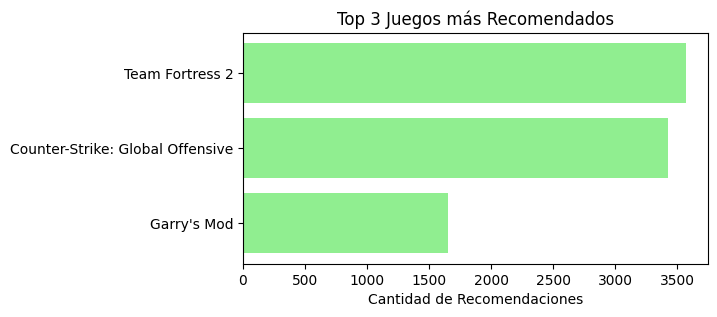

In [61]:

# Gráfico de barras horizontales para los tres juegos más recomendados
plt.figure(figsize=(6, 3))  # Tamaño del gráfico

# Barplot de Matplotlib
plt.barh(top_3_tier['app_name'], top_3_tier['recommend'], color='lightgreen')

# Títulos y etiquetas
plt.xlabel('Cantidad de Recomendaciones')
plt.title('Top 3 Juegos más Recomendados')
plt.gca().invert_yaxis()  # Invertir el eje y para que aparezcan los juegos más recomendados en la parte superior

# Mostrar gráfico
plt.show()


In [62]:
# Calcular las horas totales jugadas por juego
top_games = df_items.groupby('item_name')['playtime_forever'].sum().reset_index()

# Ordenar los juegos por horas totales jugadas y obtener el top 10
top_10_games = top_games.sort_values(by='playtime_forever', ascending=False).head(10)

# Mostrar el top 10 de juegos con más horas jugadas
top_10_games

,item_name,playtime_forever
2117,Counter-Strike: Global Offensive,775816259
3944,Garry's Mod,441871026
9076,Terraria,152997644
9249,The Elder Scrolls V: Skyrim,134851450
10393,Warframe,122726853
2118,Counter-Strike: Source,111314706
5193,Left 4 Dead 2,101191416
6605,PAYDAY 2,98405781
8139,Sid Meier's Civilization V,81187409
7705,Rust,80110135


In [63]:
# Cuantos son early acces?

df_steam['early_access'].value_counts()


early_access
0.0    30150
1.0     1944
Name: count, dtype: int64

In [64]:
juegos_por_año = df_steam['release_year'].value_counts().sort_values(ascending=False)[:15]
print(juegos_por_año)

release_year
2017       9588
2016       6935
2015       4945
2014       2841
No data    2163
2013       1550
2012       1191
2011        590
2010        441
2009        339
2008        213
2007        167
2018        159
2006        154
2005        102
Name: count, dtype: int64


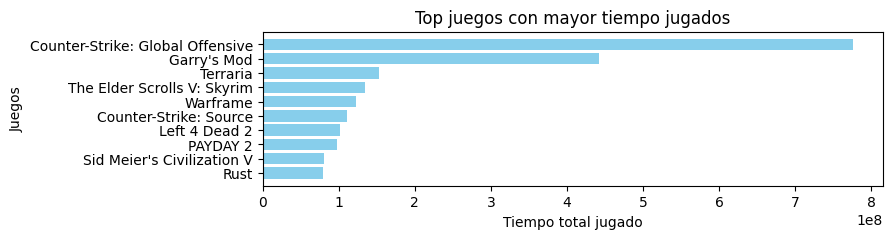

In [65]:
import matplotlib.pyplot as plt

# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(8, 2))

# Grafica un gráfico de barras horizontales
plt.barh(top_10_games['item_name'], top_10_games['playtime_forever'], color='skyblue')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Tiempo total jugado')  # Etiqueta del eje x
plt.ylabel('Juegos')  # Etiqueta del eje y
plt.title('Top juegos con mayor tiempo jugados')  # Título del gráfico

# Invierte el eje y para que los juegos con más tiempo jugado aparezcan arriba
plt.gca().invert_yaxis()

# Muestra el gráfico
plt.show()

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Tamaño de la muestra aleatoria de juegos
size = 100
random_sample = df_steam.sample(n=size, random_state=321)

# ID del juego proporcionado por el usuario
user_item_id = 10 ### Reemplazar por valor de usuario
target_game = random_sample[random_sample['item_id'] == user_item_id]

# Combinar etiquetas (tags) y géneros en una sola cadena de texto para el juego objetivo
tags_and_genres_target_game = ' '.join(target_game['tags'].fillna('').astype(str) + ' ' + target_game['genres'].fillna('').astype(str))

# Crear un vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Combinar etiquetas y géneros en una sola columna para la muestra aleatoria
random_sample['tags_and_genres'] = random_sample['tags'].fillna('').astype(str) + ' ' + random_sample['genres'].fillna('').astype(str)

# Aplicar el vectorizador TF-IDF al juego objetivo y a todos los juegos de la muestra aleatoria
tfidf_matrix = tfidf_vectorizer.fit_transform([tags_and_genres_target_game] + random_sample['tags_and_genres'].tolist())

# Calcular la similitud de coseno entre el juego objetivo y todos los juegos de la muestra
similarity_matrix = cosine_similarity(tfidf_matrix)

# Obtener los índices de los juegos más similares al juego objetivo, ordenados por similitud
similar_games_indices = similarity_matrix[0].argsort()[::-1]

# Número de recomendaciones deseadas
num_recommendations = 5
# Obtener los juegos más similares al juego objetivo (excluyendo el propio juego)
recommended_games = random_sample.reset_index(drop=True).loc[similar_games_indices[1:num_recommendations + 1]]


In [67]:
### Coincidencias entre publisher y developer


df_steam['publisher'].isin(df_steam['developer']).mean() * 100

79.77503583224279

In [68]:
df_reviews

,posted,item_id,recommend,review,user_id
0,2011,1250,True,Simple yet with great replayability. In my opi...,76561197970982479
1,2011,22200,True,It's unique and worth a playthrough.,76561197970982479
2,2011,43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,2014,251610,True,I know what you think when you see this title ...,js41637
4,2013,227300,True,For a simple (it's actually not all that simpl...,js41637
...,...,...,...,...,...
58426,No data,70,True,a must have classic from steam definitely wort...,76561198312638244
58427,No data,362890,True,this game is a perfect remake of the original ...,76561198312638244
58428,No data,273110,True,had so much fun plaing this and collecting res...,LydiaMorley
58429,No data,730,True,:D,LydiaMorley


In [69]:
df_steam

,publisher,genres,app_name,tags,price,early_access,item_id,developer,release_year
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.99,0.0,761140,Kotoshiro,2018
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",0.00,0.0,643980,Secret Level SRL,2018
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,"['Free to Play', 'Simulation', 'Sports', 'Casu...",0.00,0.0,670290,Poolians.com,2017
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,"['Action', 'Adventure', 'Casual']",0.99,0.0,767400,彼岸领域,2017
4,NaN,"['Action', 'Indie', 'Casual', 'Sports']",Log Challenge,"['Action', 'Indie', 'Casual', 'Sports']",2.99,0.0,773570,NaN,No data
...,...,...,...,...,...,...,...,...,...
32089,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,"['Strategy', 'Indie', 'Casual', 'Simulation']",1.99,0.0,773640,"Nikita ""Ghost_RUS""",2018
32090,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,"['Strategy', 'Indie', 'Casual']",4.99,0.0,733530,Sacada,2018
32091,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,"['Indie', 'Simulation', 'Racing']",1.99,0.0,610660,Laush Dmitriy Sergeevich,2018
32092,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",4.99,0.0,658870,"xropi,stev3ns",2017
